## Model Training

#### 1.1 Import Data and Required Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import pickle
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import warnings


#### Import the CSV Data as Pandas DataFrame

In [2]:
df = pd.read_csv('data.csv')

#### Show Top 5 Records

In [3]:
df.head()

,Gender,Learning Support,Parent's Education,Had Lunch,Course Completed,Percentage in Test 1,Percentage in Test 2,Percentage in Test 3
0,female,Occasional Mentoring,Bachelor,YES,none,72,72,74
1,female,Standard School Support,Undergraduate,YES,completed,69,90,88
2,female,Occasional Mentoring,Post Graduate,YES,none,90,95,93
3,male,Limited Tutoring,Associate,NO,none,47,57,44
4,male,Standard School Support,Undergraduate,YES,none,76,78,75


#### Preparing X and Y variables

In [5]:
X = df.drop(columns=['Percentage in Test 3'], axis=1)
y = df['Percentage in Test 3']



In [6]:
X.head()

,Gender,Learning Support,Parent's Education,Had Lunch,Course Completed,Percentage in Test 1,Percentage in Test 2
0,female,Occasional Mentoring,Bachelor,YES,none,72,72
1,female,Standard School Support,Undergraduate,YES,completed,69,90
2,female,Occasional Mentoring,Post Graduate,YES,none,90,95
3,male,Limited Tutoring,Associate,NO,none,47,57
4,male,Standard School Support,Undergraduate,YES,none,76,78


In [7]:
y

0      74
1      88
2      93
3      44
4      75
       ..
995    95
996    55
997    65
998    77
999    86
Name: Percentage in Test 3, Length: 1000, dtype: int64

In [8]:
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [9]:
X = preprocessor.fit_transform(X)

In [10]:
X.shape

(1000, 19)

In [11]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape


((800, 19), (200, 19))

#### Create an Evaluate Function to give all metrics after model Training

In [12]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [24]:
models = {
    "Linear Regression": LinearRegression(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))
    print('\n')

    print('FOR TEST SET')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 3.3761
- Mean Absolute Error: 2.7101
- R2 Score: 0.9499


FOR TEST SET
Model performance for Test set
- Root Mean Squared Error: 3.8685
- Mean Absolute Error: 3.2026
- R2 Score: 0.9379


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 4.1251
- Mean Absolute Error: 3.3237
- R2 Score: 0.9251


FOR TEST SET
Model performance for Test set
- Root Mean Squared Error: 5.3666
- Mean Absolute Error: 4.1700
- R2 Score: 0.8805


Decision Tree
Model performance for Training set
- Root Mean Squared Error: 0.2475
- Mean Absolute Error: 0.0200
- R2 Score: 0.9997


FOR TEST SET
Model performance for Test set
- Root Mean Squared Error: 5.7229
- Mean Absolute Error: 4.5375
- R2 Score: 0.8641


Random Forest Regressor
Model performance for Training set
- Root Mean Squared Error: 1.4888
- Mean Absolute Error: 1.1947
- R2 Score: 0.9902


FOR TEST SET
Model performance for Test set
- Root Mean

### Results

In [14]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
0,Linear Regression,0.937908
3,Random Forest Regressor,0.917223
1,K-Neighbors Regressor,0.880506
2,Decision Tree,0.866690


## Linear Regression

In [15]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 93.79


## Plot y_pred and y_test

Text(0, 0.5, 'Predicted')

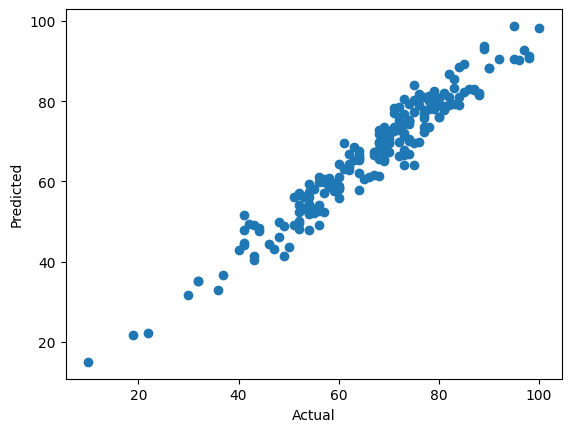

In [16]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

<Axes: xlabel='Percentage in Test 3'>

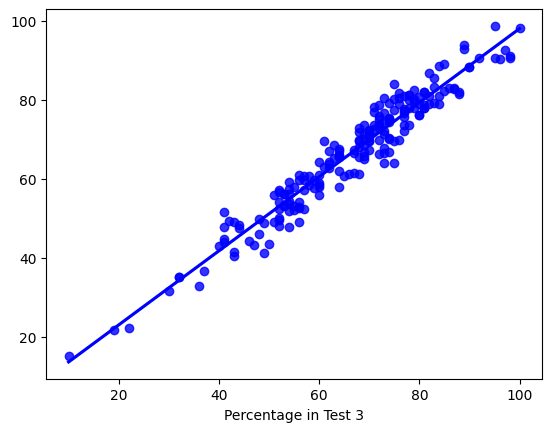

In [17]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='blue')

Accuracy of the model is 86.53


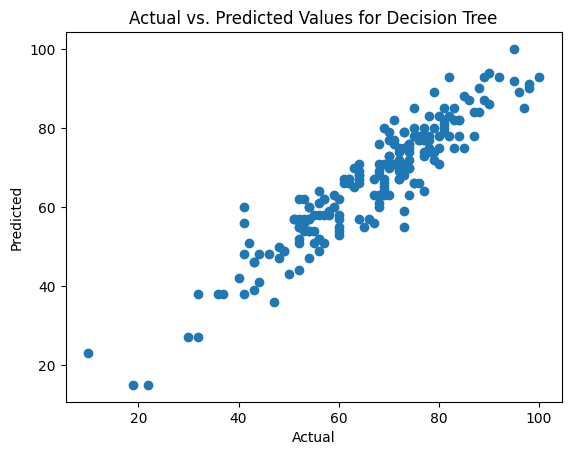

<Axes: xlabel='Percentage in Test 3'>

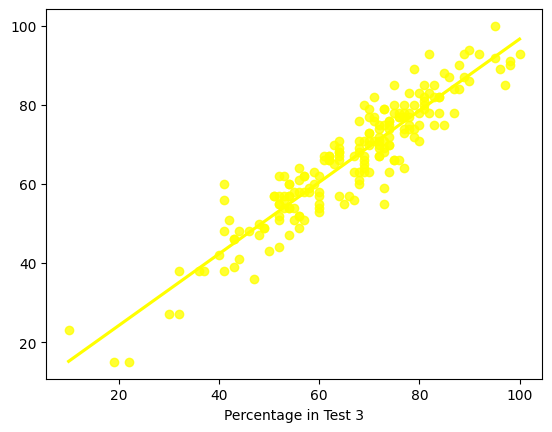

In [19]:
tree_model = DecisionTreeRegressor(random_state=0)
tree_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = tree_model.predict(X_test)

# Calculate the R-squared score
score = r2_score(y_test, y_pred) * 100
print("Accuracy of the model is %.2f" % score)

plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values for Decision Tree')
plt.show()
sns.regplot(x=y_test,y=y_pred,ci=None,color ='yellow')

In [20]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=0) 
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_model.predict(X_test)

# Calculate the R-squared score
score = r2_score(y_test, y_pred) * 100
print("Accuracy of the Random Forest model is %.2f" % score)

Accuracy of the Random Forest model is 91.73


#### Difference between Actual and Predicted Values

In [21]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,84,87.69,-3.69
737,73,69.44,3.56
740,72,72.60,-0.60
660,73,74.20,-1.20
411,78,82.70,-4.70
...,...,...,...
408,56,60.06,-4.06
332,53,56.22,-3.22
208,76,79.41,-3.41
613,74,74.19,-0.19


In [22]:
# Define your models
models = {
    "Linear Regression": LinearRegression(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
}

# Train models and save them
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Save the trained model using pickle
    model_filename = f"{model_name.replace(' ', '_').lower()}_model.pkl"
    with open(model_filename, 'wb') as f:
        pickle.dump(model, f)

    # Save the preprocessor (same for all models)
    preprocessor_filename = f"preprocessor_{model_name.replace(' ', '_').lower()}.pkl"
    with open(preprocessor_filename, 'wb') as f:
        pickle.dump(preprocessor, f)

    print(f"Saved {model_name} model and preprocessor.")

Saved Linear Regression model and preprocessor.
Saved K-Neighbors Regressor model and preprocessor.
Saved Decision Tree model and preprocessor.
Saved Random Forest Regressor model and preprocessor.


We see that Linear Regression is the best model as per the performance metrics